In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
def get_unique_values(keys, target_key, datatype = float):
    unique_c_values = set()  

    for key in keys:
        if not (target_key + "=") in key:
            continue
        key_value_pairs = key.split(", ")
        for pair in key_value_pairs:
            k, v = pair.split("=") 
            if k == target_key:
                unique_c_values.add(datatype(v))

    unique_c_values_list = sorted(list(unique_c_values))

    return unique_c_values_list

def get_param_value(filename, target_key, value_type = float):
    unique_c_values = set()

    l = filename.split("_")
    
    tmp = l[l.index(target_key) + 1]
    if ".json" in tmp:
        val = value_type(tmp[:-5])
    else:
        val = value_type(tmp)

    return val

In [7]:
import json, glob
import numpy as np

gate_type = "haar"
c = 5.0
J=10
eps = 1e-4
n_data = 3000
z_thres = 1e-2

sname = f"../results/error_profile/error_profile_{gate_type}_c_{c}_J_{J}_eps_{eps:.2e}_ndata_*.json"
fname_list = glob.glob(sname)
print(fname_list)
ndata_candidates = [get_param_value(_f, "ndata", int) for _f in fname_list]
print("\ncandidates for ndata:")
print(ndata_candidates)
print(f"your choice: {n_data}")

filename = f"../results/error_profile/error_profile_{gate_type}_c_{c}_J_{J}_eps_{eps:.2e}_ndata_{n_data}"
if z_thres != 1e-2:
    filename += f"_zthres_{z_thres:.2e}"
filename += ".json"

#result_data_loaded = json.load(open(filename, "r"))
result_data = json.load(open(filename, "r"))
print(f"loaded from {filename}")    

['../results/error_profile/error_profile_haar_c_5.0_J_10_eps_1.00e-04_ndata_3000.json']

candidates for ndata:
[3000]
your choice: 3000
loaded from ../results/error_profile/error_profile_haar_c_5.0_J_10_eps_1.00e-04_ndata_3000.json


In [8]:
print(f"success rate for {c=}, {J=}, {n_data =}")
for constraint in result_data.keys():
    print(f"{constraint} : ", np.nanmean(result_data[constraint]["success"]))

success rate for c=5.0, J=10, n_data =3000
pauli :  1.0
XY :  0.12466666666666666
X :  0.0003333333333333333
depol :  1.0


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Vertices of the triangle
vy = np.array([np.cos(-np.pi/6), np.sin(-np.pi/6)])
vx = np.array([np.cos(7*np.pi/6), np.sin(7 * np.pi/6)])
vz = np.array([0, 1])
v = np.array([vx,vy,vz])

bins = [40, 40]

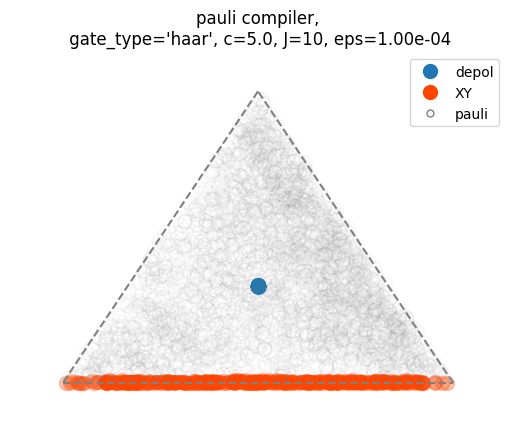

In [10]:
bins = [30, 30]

colors = ["C0", "orangered", "gray"]
CONSTRAINTS = ["depol", "XY", "pauli"]

fig, ax = plt.subplots()

for color, constraint in zip(colors, CONSTRAINTS):
    points = np.array([err @ v for err, success in zip(result_data[constraint]["error_rate_ratio"], result_data[constraint]["success"]) if success])

    if constraint != "pauli":
        #plt.plot(points[:, 0], points[:, 1], "o", alpha = 0.1, markerfacecolor = "none", markersize = 10, color = color)
        plt.plot(points[:, 0], points[:, 1], "o", alpha = 0.3, markersize = 10, color = color)
        plt.plot([], [], "o", markersize = 10, color = color, label = constraint)
    else:
        plt.plot(points[:, 0], points[:, 1], "o", alpha = 0.05, markerfacecolor = "none", markersize = 10, color = color)
        plt.plot([], [], "o", markerfacecolor = "none", markersize = 5, color = color, label = constraint)

plt.plot([vx[0], vy[0]], [vx[1], vy[1]], color = "gray", linestyle = "--")
plt.plot([vy[0], vz[0]], [vy[1], vz[1]], color = "gray", linestyle = "--")
plt.plot([vz[0], vx[0]], [vz[1], vx[1]], color = "gray", linestyle = "--")

# Define the triangle boundaries
x = np.linspace(-np.sqrt(3)/2-0.3, np.sqrt(3)/2+0.3, 10000)
y1 = np.full_like(x, -0.5)
y2 = np.sqrt(3)*x + 1
y3 = -np.sqrt(3)*x + 1

plt.xlim(-1.1, 1.1)
plt.ylim(-0.7, 1.2)
plt.xticks([])
plt.yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
plt.title(f"{constraint} compiler,\n {gate_type=}, {c=}, {J=}, eps={eps:.2e}")


plt.legend()